In [1]:
import tequila as tq

In [2]:
mg_d_eq = 2.239
def make_ace_mg_zmatrix(d):
    return f"""
C
C   1  1.490
O   1  1.269  2 122.4
O   1  1.271  2 121.3  3  180.0
H   2  1.089  1 108.3  3  58.25
H   2  1.089  1 108.3  3 -58.25
H   2  1.084  1 110.6  3  180.0
Mg    1  {d:4.3f}  2 180.0  3 0.0"""

In [3]:
molecule0 = tq.chemistry.Molecule(geometry = make_ace_mg_zmatrix(mg_d_eq), basis_set="cc-pvdz", charge=1)
print(molecule0)



felez: [array([ 6.,  6.,  8.,  8.,  1.,  1.,  1., 12.])]
all_fc_known: True
all_fm_known: True
zel: 43.0
fzel: [43.0]
c: [1.0, 0]
fc: [0.0]
m: [1]
fm: [2]
Assess candidate (1.0, (0.0,), 1, (2,)): 1   2   3   4   4-0 5   5-0 6   6-0 7   7-0
Assess candidate (1.0, (0.0,), 1, (2,)): T       T   T   T   T   T   T   T   T   T   --> False
Assess candidate (0, (0.0,), 1, (2,)): T   T   T   T   T       T       T   T   T   --> False
Following warning is harmless if you've altered chgmult through `set_molecular_change` or `set_multiplicity`. Such alterations are an expert feature. Specifying in the original molecule string is preferred.


felez: [array([ 6.,  6.,  8.,  8.,  1.,  1.,  1., 12.])]
all_fc_known: True
all_fm_known: True
zel: 43.0
fzel: [43.0]
c: [1.0, 0]
fc: [0.0]
m: [1]
fm: [2]
Assess candidate (1.0, (0.0,), 1, (2,)): 1   2   3   4   4-0 5   5-0 6   6-0 7   7-0
Assess candidate (1.0, (0.0,), 1, (2,)): T       T   T   T   T   T   T   T   T   T   --> False
Assess candidate (0, (0.0,

In [3]:
molecule1 = tq.chemistry.Molecule(geometry = make_ace_mg_zmatrix(mg_d_eq), basis_set="cc-pvdz", charge=1,
                                 active_orbitals={"A'": [17] , 'A"': [3, 4, 5, 6]})



felez: [array([ 6.,  6.,  8.,  8.,  1.,  1.,  1., 12.])]
all_fc_known: True
all_fm_known: True
zel: 43.0
fzel: [43.0]
c: [1.0, 0]
fc: [0.0]
m: [1]
fm: [2]
Assess candidate (1.0, (0.0,), 1, (2,)): 1   2   3   4   4-0 5   5-0 6   6-0 7   7-0
Assess candidate (1.0, (0.0,), 1, (2,)): T       T   T   T   T   T   T   T   T   T   --> False
Assess candidate (0, (0.0,), 1, (2,)): T   T   T   T   T       T       T   T   T   --> False
Following warning is harmless if you've altered chgmult through `set_molecular_change` or `set_multiplicity`. Such alterations are an expert feature. Specifying in the original molecule string is preferred.


felez: [array([ 6.,  6.,  8.,  8.,  1.,  1.,  1., 12.])]
all_fc_known: True
all_fm_known: True
zel: 43.0
fzel: [43.0]
c: [1.0, 0]
fc: [0.0]
m: [1]
fm: [2]
Assess candidate (1.0, (0.0,), 1, (2,)): 1   2   3   4   4-0 5   5-0 6   6-0 7   7-0
Assess candidate (1.0, (0.0,), 1, (2,)): T       T   T   T   T   T   T   T   T   T   --> False
Assess candidate (0, (0.0,

In [4]:
print(molecule1)

<class 'tequila.quantumchemistry.psi4_interface.QuantumChemistryPsi4'>
Qubit Encoding
JordanWigner

Parameters
basis_set       : cc-pvdz         
geometry        : 
C
C   1  1.490
O   1  1.269  2 122.4
O   1  1.271  2 121.3  3  180.0
H   2  1.089  1 108.3  3  58.25
H   2  1.089  1 108.3  3 -58.25
H   2  1.084  1 110.6  3  180.0
Mg    1  2.239  2 180.0  3 0.0 
description     :                 
multiplicity    : 1               
charge          : 1               
closed_shell    : True            
name            : molecule        

Psi4 Data
Point Group (full) : cs              
Point Group (used) : cs              
nirrep          : 2 
irreps          : ["A'", 'A"'] 
mos per irrep   : [62, 27]        
Active Space Data:
active_orbitals : [20, 21, 22, 26, 27] 
reference_orbitals : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 
frozen_docc     : [17, 3]         
frozen_uocc     : [44, 20]        

Orbitals:
0 : 0A' energy = -49.343850 
1 : 1A' energy = -20.7

In [5]:
# make the hamiltonian
H = molecule1.make_hamiltonian()
print(f"Hamiltonian qubits: {H.n_qubits}")
print(f"Hamiltonian terms: {len(H)}")

Hamiltonian qubits: 10
Hamiltonian terms: 492


In [6]:
mp2 = molecule1.compute_energy(method="mp2")
print(f"MP2 Energy: {mp2}")
# Note there are known issues for some methods when the active space as frozen virtuals as is the case here
# detci based methods are fine again 
fci = molecule1.compute_energy(method="fci")
print(f"FCI Energy: {fci}")

# for most coupled-cluster like models you can compute amplitudes
# Amplitudes are computed in c1 and in the full space, this is why the active space troubles from above usually don't hold
# Note that amplitudes are in closed-shell
amplitudes = molecule1.compute_amplitudes("mp2")

# you can export a parameter dictionary which holds the indices of the amplitude as keys and values as values
# for this small active space that is only one amplitude for mp2
variables = amplitudes.make_parameter_dictionary()
print(variables)

# similar for ccsd since the singles are 0 due to symmetry (that changes if you change the active space)
amplitudes = molecule1.compute_amplitudes("ccsd")
variables = amplitudes.make_parameter_dictionary()
print(variables)

There are known issues with some psi4 methods and frozen virtual orbitals. Proceed with fingers crossed for mp2.


felez: [array([ 6.,  6.,  8.,  8.,  1.,  1.,  1., 12.])]
all_fc_known: True
all_fm_known: True
zel: 43.0
fzel: [43.0]
c: [1.0, 0]
fc: [0.0]
m: [1]
fm: [2]
Assess candidate (1.0, (0.0,), 1, (2,)): 1   2   3   4   4-0 5   5-0 6   6-0 7   7-0
Assess candidate (1.0, (0.0,), 1, (2,)): T       T   T   T   T   T   T   T   T   T   --> False
Assess candidate (0, (0.0,), 1, (2,)): T   T   T   T   T       T       T   T   T   --> False
Following warning is harmless if you've altered chgmult through `set_molecular_change` or `set_multiplicity`. Such alterations are an expert feature. Specifying in the original molecule string is preferred.
MP2 Energy: -426.68080178484655
FCI Energy: -426.682565190734
{(3, 0, 3, 0): -0.04400150339038797, (4, 0, 3, 0): -0.01370803925495982, (3, 0, 4, 0): -0.013708039254959815, (4, 0, 4, 0): -0.004901911756683795, (3, 0, 2, 0): 0.0028961063832846482, (2, 

In [7]:
threshold=1.0e-6
# make the UCCSD ansatz (note that this will be without singles since it starts from mp2)
#U = molecule1.make_uccsd_ansatz(initial_amplitudes="mp2", threshold=threshold, trotter_steps=1)
U = molecule1.make_upccgsd_ansatz(order=1, name='UpCCGSD')

# define the expectationvalue
E = tq.ExpectationValue(H=H, U=U)

# optimize
result = tq.minimize(objective=E, method="BFGS", initial_values=0.0)

# compute a reference value with psi4
#fci = molecule.compute_energy(method="fci")

print("VQE : {:+2.8}f".format(result.energy))
print("FCI : {:+2.8}f".format(fci))

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 60 expectationvalues

active variables : 20

E=-426.67811427  angles= {(((0, 1),), 'D', (None, 0)): 0.0, (((0, 2),), 'D', (None, 0)): 0.0, (((0, 3),), 'D', (None, 0)): 0.0, (((0, 4),), 'D', (None, 0)): 0.0, (((1, 2),), 'D', (None, 0)): 0.0, (((1, 3),), 'D', (None, 0)): 0.0, (((1, 4),), 'D', (None, 0)): 0.0, (((2, 3),), 'D', (None, 0)): 0.0, (((2, 4),), 'D', (None, 0)): 0.0, (((3, 4),), 'D', (None, 0)): 0.0, ((0, 1), 'S', (None, 0)): 0.0, ((0, 2), 'S', (None, 0)): 0.0, ((0, 3), 'S', (None, 0)): 0.0, ((0, 4), 'S', (None, 0)): 0.0, ((1, 2), 'S', (None, 0)): 0.0, ((1, 3), 'S', (None, 0)): 0.0, ((1, 4), 'S', (None, 0)): 0.0, ((2, 3), 'S', (None, 0)): 0.0, ((2, 4), 'S', (None, 0)): 0.0, ((3, 4), 'S', (None, 0)): 0.0}  samples= 

E=-426.68216573  angles= {(((0, 1),), 'D', (None, 0)): -0.000853463193107686, (((0, 2),), 'D', (None, 0)): 0.009325136463849241, (((0, 3),), 'D', (None, 0)): -0.14212884297949038, (((0, 4),), 'D', (None, 0)): 0.01938953941675969, (((1, 2),), 'D', (None, 0)): 0.0, (((1, 3),), 'D', (None, 0)): -0.00013373193299360422, (((1, 4),), 'D', (None, 0)): 0.00017388261580144202, (((2, 3),), 'D', (None, 0)): 0.0006967790117918974, (((2, 4),), 'D', (None, 0)): -0.00017388261580144205, (((3, 4),), 'D', (None, 0)): -0.0020617562286168374, ((0, 1), 'S', (None, 0)): 0.0, ((0, 2), 'S', (None, 0)): -0.002905988211832303, ((0, 3), 'S', (None, 0)): -0.0030199117981567027, ((0, 4), 'S', (None, 0)): 0.0023772604852931732, ((1, 2), 'S', (None, 0)): 0.0, ((1, 3), 'S', (None, 0)): 0.0, ((1, 4), 'S', (None, 0)): 0.0, ((2, 3), 'S', (None, 0)): -0.04621038206216478, ((2, 4), 'S', (None, 0)): -0.0005082678883424668, ((3, 4), 'S', (None, 0)): -0.3341468493485701}  samples= None
E=-426.68231859  angles= {(((0, 1),), 

In [8]:
molecule1.compute_energy("hf")



felez: [array([ 6.,  6.,  8.,  8.,  1.,  1.,  1., 12.])]
all_fc_known: True
all_fm_known: True
zel: 43.0
fzel: [43.0]
c: [1.0, 0]
fc: [0.0]
m: [1]
fm: [2]
Assess candidate (1.0, (0.0,), 1, (2,)): 1   2   3   4   4-0 5   5-0 6   6-0 7   7-0
Assess candidate (1.0, (0.0,), 1, (2,)): T       T   T   T   T   T   T   T   T   T   --> False
Assess candidate (0, (0.0,), 1, (2,)): T   T   T   T   T       T       T   T   T   --> False
Following warning is harmless if you've altered chgmult through `set_molecular_change` or `set_multiplicity`. Such alterations are an expert feature. Specifying in the original molecule string is preferred.


felez: [array([ 6.,  6.,  8.,  8.,  1.,  1.,  1., 12.])]
all_fc_known: True
all_fm_known: True
zel: 43.0
fzel: [43.0]
c: [1.0, 0]
fc: [0.0]
m: [1]
fm: [2]
Assess candidate (1.0, (0.0,), 1, (2,)): 1   2   3   4   4-0 5   5-0 6   6-0 7   7-0
Assess candidate (1.0, (0.0,), 1, (2,)): T       T   T   T   T   T   T   T   T   T   --> False
Assess candidate (0, (0.0,

-426.67769187327826

In [9]:
print(fci)
print(mp2)
print(result.energy)

-426.682565190734
-426.68080178484655
-426.6825584518119


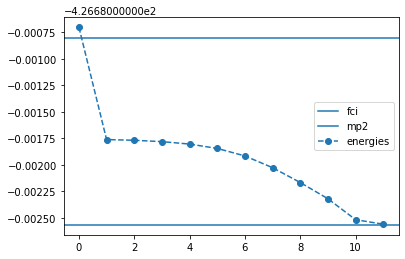

In [10]:
result.history.plot("energies", baselines={"fci":fci,  "mp2":mp2}, filename="McAce_17-3_3-2_result_bfgs")

In [3]:
if 'qiskit' in tq.INSTALLED_SIMULATORS:
    backend = "qiskit"
    device = "fake_valencia"
else:
    backend = None
    device = None

In [4]:
backend

'qiskit'

In [7]:
molecule2 = tq.chemistry.Molecule(geometry = make_ace_mg_zmatrix(mg_d_eq), basis_set="cc-pvdz", charge=1,
                                 active_orbitals={"A'": [17] , 'A"': [3, 4, 5, 6]},
                                 transformation="BravyiKitaev")



felez: [array([ 6.,  6.,  8.,  8.,  1.,  1.,  1., 12.])]
all_fc_known: True
all_fm_known: True
zel: 43.0
fzel: [43.0]
c: [1.0, 0]
fc: [0.0]
m: [1]
fm: [2]
Assess candidate (1.0, (0.0,), 1, (2,)): 1   2   3   4   4-0 5   5-0 6   6-0 7   7-0
Assess candidate (1.0, (0.0,), 1, (2,)): T       T   T   T   T   T   T   T   T   T   --> False
Assess candidate (0, (0.0,), 1, (2,)): T   T   T   T   T       T       T   T   T   --> False
Following warning is harmless if you've altered chgmult through `set_molecular_change` or `set_multiplicity`. Such alterations are an expert feature. Specifying in the original molecule string is preferred.


felez: [array([ 6.,  6.,  8.,  8.,  1.,  1.,  1., 12.])]
all_fc_known: True
all_fm_known: True
zel: 43.0
fzel: [43.0]
c: [1.0, 0]
fc: [0.0]
m: [1]
fm: [2]
Assess candidate (1.0, (0.0,), 1, (2,)): 1   2   3   4   4-0 5   5-0 6   6-0 7   7-0
Assess candidate (1.0, (0.0,), 1, (2,)): T       T   T   T   T   T   T   T   T   T   --> False
Assess candidate (0, (0.0,

In [8]:
H = molecule2.make_hamiltonian()
UpCCGSD = molecule2.make_upccgsd_ansatz(name="UpCCSD")
E2 = tq.ExpectationValue(H=H, U=UpCCGSD, optimize_measurements=True)
ucc = tq.minimize(method="cobyla", objective=E2, initial_values=0.0)

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : COBYLA
Objective       : 26 expectationvalues

active variables : 8

E=-426.67813110  angles= {(((0, 1),), 'D', (None, 0)): 0.0, (((0, 2),), 'D', (None, 0)): 0.0, (((0, 3),), 'D', (None, 0)): 0.0, (((0, 4),), 'D', (None, 0)): 0.0, ((0, 1), 'S', (None, 0)): 0.0, ((0, 2), 'S', (None, 0)): 0.0, ((0, 3), 'S', (None, 0)): 0.0, ((0, 4), 'S', (None, 0)): 0.0}  samples= None
E=-426.47427368  angles= {(((0, 1),), 'D', (None, 0)): 1.0, (((0, 2),), 'D', (None, 0)): 0.0, (((0, 3),), 'D', (None, 0)): 0.0, (((0, 4),), 'D', (None, 0)): 0.0, ((0, 1), 'S', (None, 0)): 0.0, ((0, 2), 'S', (None, 0)): 0.0, ((0, 3), 'S', (None, 0)): 0.0, ((0, 4), 'S', (None, 0)): 0.0}  samples= None
E=-426.44723511  angles= {(((0, 1),), 'D', (None, 0)): 0.0, (((0, 2),), 'D', (None, 0)): 1.0, (((0, 3),), 'D', (None, 0))

E=-426.67871094  angles= {(((0, 1),), 'D', (None, 0)): -0.0005180912218628195, (((0, 2),), 'D', (None, 0)): -0.014917598243070129, (((0, 3),), 'D', (None, 0)): 0.025370873394244195, (((0, 4),), 'D', (None, 0)): 0.03259517359690327, ((0, 1), 'S', (None, 0)): 0.02059015921839924, ((0, 2), 'S', (None, 0)): -0.01291235468940511, ((0, 3), 'S', (None, 0)): 0.00019700956830747847, ((0, 4), 'S', (None, 0)): 0.037237050265979905}  samples= None
E=-426.67776489  angles= {(((0, 1),), 'D', (None, 0)): -0.0006355470035508817, (((0, 2),), 'D', (None, 0)): -0.034146322103216165, (((0, 3),), 'D', (None, 0)): 0.011918899380002462, (((0, 4),), 'D', (None, 0)): 0.03927153296534057, ((0, 1), 'S', (None, 0)): 0.02341388092409337, ((0, 2), 'S', (None, 0)): -0.0009938601764514828, ((0, 3), 'S', (None, 0)): 0.015285806858704652, ((0, 4), 'S', (None, 0)): 0.035345018512538}  samples= None
E=-426.68054199  angles= {(((0, 1),), 'D', (None, 0)): -0.0003338455119244335, (((0, 2),), 'D', (None, 0)): 0.0031113604926

E=-426.68145752  angles= {(((0, 1),), 'D', (None, 0)): -0.024379381076592956, (((0, 2),), 'D', (None, 0)): -0.003094065315566331, (((0, 3),), 'D', (None, 0)): 0.1304699560523132, (((0, 4),), 'D', (None, 0)): 0.018285918951647308, ((0, 1), 'S', (None, 0)): 0.018465843303270474, ((0, 2), 'S', (None, 0)): 0.004696732796894218, ((0, 3), 'S', (None, 0)): -0.003092403023529612, ((0, 4), 'S', (None, 0)): 0.01032133503365663}  samples= None
E=-426.68164062  angles= {(((0, 1),), 'D', (None, 0)): -0.009102180091988097, (((0, 2),), 'D', (None, 0)): -0.002040175075408132, (((0, 3),), 'D', (None, 0)): 0.13602779506871032, (((0, 4),), 'D', (None, 0)): 0.01136842723168511, ((0, 1), 'S', (None, 0)): 0.013311533428562276, ((0, 2), 'S', (None, 0)): 0.00289805993060767, ((0, 3), 'S', (None, 0)): -0.0017844280444220444, ((0, 4), 'S', (None, 0)): 0.017959296084153902}  samples= None
E=-426.68170166  angles= {(((0, 1),), 'D', (None, 0)): -0.004222274894419583, (((0, 2),), 'D', (None, 0)): -0.001081246604861

E=-426.68164062  angles= {(((0, 1),), 'D', (None, 0)): -0.004182347082061419, (((0, 2),), 'D', (None, 0)): -0.0012378035880198216, (((0, 3),), 'D', (None, 0)): 0.1298684296083389, (((0, 4),), 'D', (None, 0)): 0.014566192059163405, ((0, 1), 'S', (None, 0)): 0.010600135509967233, ((0, 2), 'S', (None, 0)): -0.007879987392986993, ((0, 3), 'S', (None, 0)): 0.005350501103030157, ((0, 4), 'S', (None, 0)): 0.01581548152966297}  samples= None
E=-426.68167114  angles= {(((0, 1),), 'D', (None, 0)): -0.004367976001965059, (((0, 2),), 'D', (None, 0)): -0.0012069323210503395, (((0, 3),), 'D', (None, 0)): 0.12950745181119172, (((0, 4),), 'D', (None, 0)): 0.015806603301176447, ((0, 1), 'S', (None, 0)): 0.0110913919381116, ((0, 2), 'S', (None, 0)): -0.006337029326877415, ((0, 3), 'S', (None, 0)): 0.0042452547807869685, ((0, 4), 'S', (None, 0)): 0.015492831251451658}  samples= None
E=-426.68170166  angles= {(((0, 1),), 'D', (None, 0)): -0.004349348070028677, (((0, 2),), 'D', (None, 0)): -0.0008695283280

In [10]:
samples = 10000

In [12]:
noisy_ucc = tq.minimize(method="cobyla", objective=E2, samples=samples, 
                        backend=backend, device="qasm_simulator", initial_values=0.0)

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qiskit
device          : qasm_simulator
samples         : 10000
save_history    : True
noise           : None

Method          : COBYLA
Objective       : 26 expectationvalues

active variables : 8



ERROR: Failed to load qobj: [json.exception.type_error.302] type must be array, but is number
capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


AttributeError: 'list' object has no attribute 'items'